<a href="https://colab.research.google.com/github/NacliNaclo/EDOS/blob/main/Copy_of_NLP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NATURAL LANGUAGE PROSESSING PROJECT - 2022/2023

## PROJECT TITLE: EDOS(Emotional Dialogues in Open Subtitles)

### Ranna Yeerken -  
### Xiaohao Zhang -  
### Andrea Naclerio - 10938883







# INDEX AND FINAL AIM
This notebook shows a brief descritpion of several feature about the datset we will use. Morover it has been analysed several methods to implement a semntimential analysis of sentecens.
More in detail:

1.   Dataset description
2.   Senteces indexing 
3.   Train2Vect Embedding
4.   Logistic regression
5.   Neural Network 
6.   BERT model
7.   Advance BERT training





# 1.DATASET DESCRIPTION
Before starting to work, the first step is to take a look to the dataset and understadn what's its content. 

As first, we need to connect the Google Drive storage to our notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 1.1 DATA LOADING
The dataset is a csv file. The pandas library is imported in order to upload the dataset from a csv file.

As we can see, the dataset contains conversations made up from 2 to 5 sentences, each labeled with a emotion (that is out target variable). 
In particular, there are 5 features:
1.  **dialague_id**: it represents the dialague from which each sentece belongs. 
Sentences belonging from the same dialague have a equal dialague id.

2. **turn** : it represent the apperance order of the difference sentences that belong to the same dialague
3.  **uttr**: it represents each single sentence
4. **eb+_emot** : it is the emotion related to the senteces
5.  **label_confidence** : it represent the 'accuracy' of the emotions associated to each sentence


In [3]:
# import Pandas library
import pandas as pd 

#import the data from the EDOS.cv file in a dataframe df using the function read from the Pandas library
df = pd.read_csv('/content/drive/MyDrive/NPL/EDOS.csv') 
df

,dialogue_id,turn,uttr,eb+_emot,label_confidence
0,97,1,You moron ! What fool washes diapers by the we...,angry,0.437522
1,97,2,You useless fool !,furious,0.731564
2,99,1,How dare you sleep !,furious,0.605636
3,99,2,Up ! Go and clean the house .,prepared,0.650449
4,100,1,Clean the kitchen .,prepared,0.742187
...,...,...,...,...,...
2829421,8820621,3,This is so stupid . How can I be upset over so...,furious,0.455627
2829422,8820621,4,It 's negative ?,acknowledging,0.440911
2829423,8820621,5,"No , it 's positive .",agreeing,0.428994
2829424,8820637,1,Thank God !,grateful,0.987517


# 1.1 DATASET STATISTICS

As first, let's check the size of the data set. 

The dataset contains more than 2 milions of senteces grouped in 1 milion dialagues. It's a massive dataset 🤯



In [4]:
# computing the lenght of the dataset to see the number of sentences
len(df) 

2829426

In [5]:
# taking only the dialague_id feature and create a set in order to discard the repetions; in this way the number of sentences is computed
len(set(df["dialogue_id"]))

1000000

## 1.1.1 EMOTIONS

After we analyse the dimension of the dataset, it can be interesting looking at the different target variables. 

Analysing on the eb+_emot feature, 41 different emotions are been found. Myabe In my entire life I don't test all these emotions :)


TODO : add comments about the emotions we have inside 

In [6]:
# in order to retrive only one copy of the different emotion, this time the drop_duplicated function is used
emote = df["eb+_emot"].drop_duplicates().tolist() 
emote

['angry',
 'furious',
 'prepared',
 'acknowledging',
 'trusting',
 'confident',
 'hopeful',
 'caring',
 'sentimental',
 'anticipating',
 'wishing',
 'surprised',
 'ashamed',
 'questioning',
 'sad',
 'nostalgic',
 'devastated',
 'terrified',
 'embarrassed',
 'lonely',
 'encouraging',
 'suggesting',
 'content',
 'afraid',
 'impressed',
 'agreeing',
 'apprehensive',
 'proud',
 'annoyed',
 'anxious',
 'grateful',
 'excited',
 'neutral',
 'faithful',
 'guilty',
 'consoling',
 'disgusted',
 'disappointed',
 'jealous',
 'joyful',
 'sympathizing']

In [7]:
# computing the length of the emote list
len(emote)

41

Now, more statistics about the emotions are computed. 



As first can be importat to understannd how the different emotions are distributed inside our dataset.

It's better to use a increasing scale to analyse better it. Looking at list, it can be seen that some emotions have an very high occurance while other a very low one; for this reason the dataset is not homogenous.

In particular, the ***'questioning'*** emotion has a frequency of **800'000** times; it's too big with respect to the others.

In [8]:
from collections import Counter #count theoccurances of the label to understand the distribution of the different labels

label_count = Counter(df['eb+_emot'])
label_count

Counter({'angry': 34924,
         'furious': 169917,
         'prepared': 48883,
         'acknowledging': 138165,
         'trusting': 134197,
         'confident': 84918,
         'hopeful': 54012,
         'caring': 42806,
         'sentimental': 20715,
         'anticipating': 100433,
         'wishing': 108668,
         'surprised': 46022,
         'ashamed': 14797,
         'questioning': 841556,
         'sad': 66262,
         'nostalgic': 20461,
         'devastated': 17539,
         'terrified': 28730,
         'embarrassed': 32338,
         'lonely': 16396,
         'encouraging': 10329,
         'suggesting': 101591,
         'content': 64569,
         'afraid': 49285,
         'impressed': 25045,
         'agreeing': 96562,
         'apprehensive': 46727,
         'proud': 33365,
         'annoyed': 30072,
         'anxious': 8578,
         'grateful': 42222,
         'excited': 53756,
         'neutral': 55932,
         'faithful': 25029,
         'guilty': 30043,
        

In [9]:
dict(sorted(label_count.items(), key=lambda item: item[1]))

{'anxious': 8578,
 'encouraging': 10329,
 'ashamed': 14797,
 'disgusted': 15070,
 'lonely': 16396,
 'consoling': 17256,
 'devastated': 17539,
 'disappointed': 18298,
 'nostalgic': 20461,
 'sentimental': 20715,
 'jealous': 20902,
 'joyful': 24282,
 'faithful': 25029,
 'impressed': 25045,
 'terrified': 28730,
 'guilty': 30043,
 'annoyed': 30072,
 'embarrassed': 32338,
 'proud': 33365,
 'angry': 34924,
 'sympathizing': 38774,
 'grateful': 42222,
 'caring': 42806,
 'surprised': 46022,
 'apprehensive': 46727,
 'prepared': 48883,
 'afraid': 49285,
 'excited': 53756,
 'hopeful': 54012,
 'neutral': 55932,
 'content': 64569,
 'sad': 66262,
 'confident': 84918,
 'agreeing': 96562,
 'anticipating': 100433,
 'suggesting': 101591,
 'wishing': 108668,
 'trusting': 134197,
 'acknowledging': 138165,
 'furious': 169917,
 'questioning': 841556}

Maybe a graphical representation of the emotions frequency can be better to analyses the distribution. 

For this reason a barchar ploit is used to represent the frequency of each of the 41 emetions presented in the dataset.
(NB. since the emotions occurances are very large, a 	logarithmic scale is used)


It can be seen that some emotions deferes of 10 times that represents a relevant quntity 

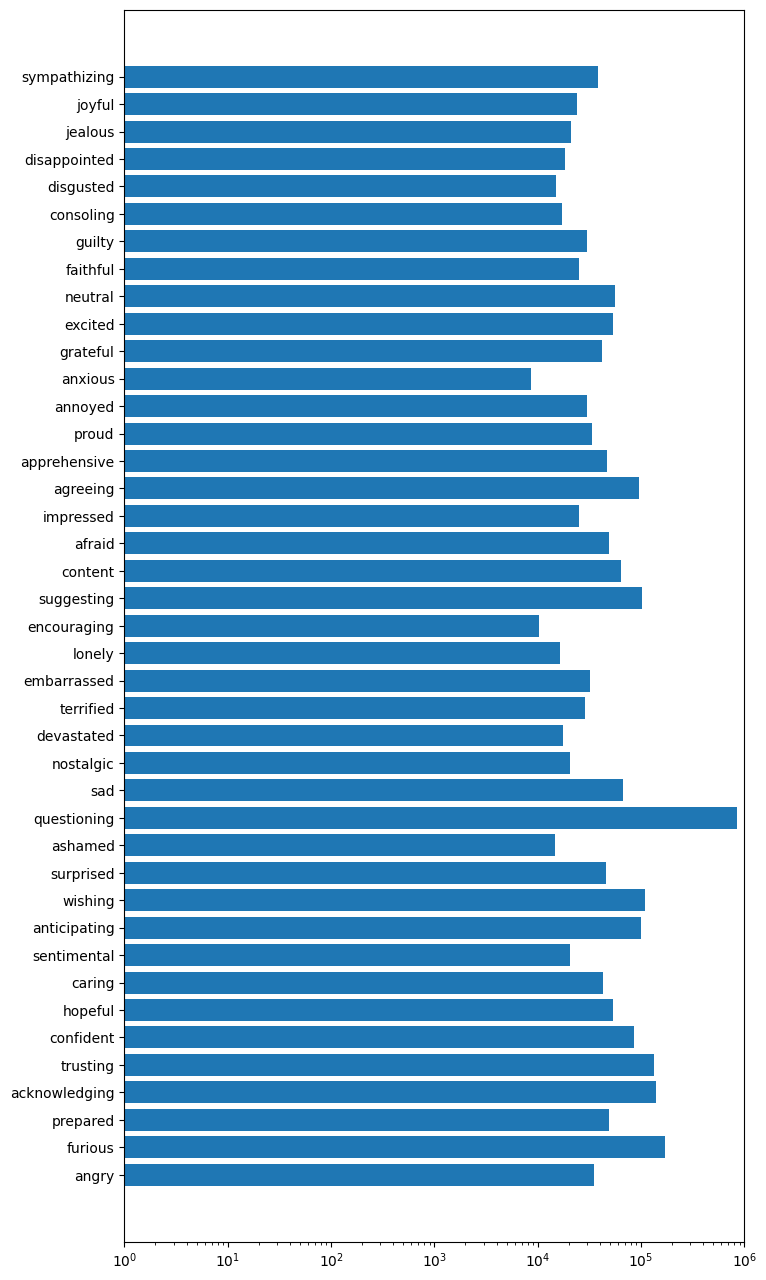

In [10]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 16))
plt.barh(range(len(label_count)), label_count.values())
plt.yticks(range(len(label_count)), label_count.keys())
plt.xscale('log') #i'm plotting with a logaritmic scale (use for visualize the data)
plt.xlim([1, 1000000])
plt.show()

# 1.1.2 SENTENCES

Now some statistics about the senteces have been analysed

In [13]:
# look at the first 10 senteces of the dataset
sentence = df["uttr"].tolist()
sentence[:10] 

['You moron ! What fool washes diapers by the well !',
 'You useless fool !',
 'How dare you sleep !',
 'Up ! Go and clean the house .',
 'Clean the kitchen .',
 "I cleaned the kitchen , ma 'am .",
 'Your name means to trust . It also means truth . And endurance . Or it could be god .',
 "You were given a great name . You 'd better live up to it .",
 "I 'll go home in the spring once the snow melts .",
 "Listen . No matter how tough it gets I wouldn 't bring shame to you and your dad . I promise I won 't ."]

Now, all the senteces are tranformed in lower case. This is a importat step in the data processing before train the model. 

In this case, same words but with different case are equal otherwise they would be consider different.
This happen when we try to convert our senteces in vectors using the Bag of words representation.



For each sentence, this method associates a vector with dimension equal to the vocabulary size of all the dataset. So each position of the vector corresponds to a words and the value is the frequency of the words inside the sentence.

Senteces are very short, so the number of words inside a single sentence is very low with respect the vocabulary size. For this reason each sentence is represented by a sparse vector.

In [15]:
# convert all the sentences in lower case
lc_sentence = [x.lower() for x in sentence]
lc_sentence[:10]

['you moron ! what fool washes diapers by the well !',
 'you useless fool !',
 'how dare you sleep !',
 'up ! go and clean the house .',
 'clean the kitchen .',
 "i cleaned the kitchen , ma 'am .",
 'your name means to trust . it also means truth . and endurance . or it could be god .',
 "you were given a great name . you 'd better live up to it .",
 "i 'll go home in the spring once the snow melts .",
 "listen . no matter how tough it gets i wouldn 't bring shame to you and your dad . i promise i won 't ."]

Let's look at the length of the different sentences in our dataset

In [16]:
# compute the length of each single sentece in the dataset
sentence_len = [len(x) for x in lc_sentence] 
sentence_len[:10] # show only the first 10

[50, 18, 20, 29, 19, 32, 85, 59, 49, 103]

It can be useful have a graphical representation of the different sentences length. 

Morever it has been computed the mean value of the senteces length that equal to **59** characters

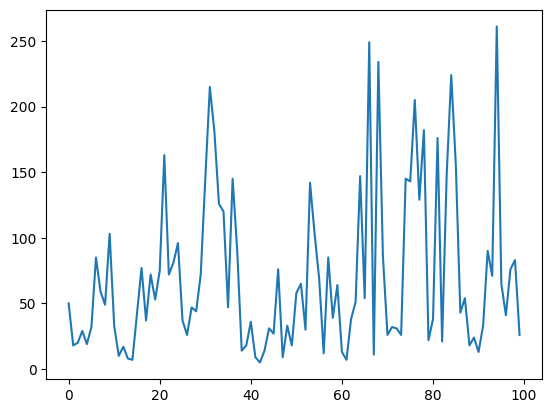

In [18]:
# graphical representation of sentences length
import matplotlib.pyplot as plt
plt.plot(range(len(sentence_len[0:100])), sentence_len[0:100])


In [ ]:
# compute the average length of all the sentences
import statistics
avg_length = statistics.mean(sentence_len)
print('Senteces in the EDOS dataset are long ' + str(round(avg_length)) + ' characters in average')

Senteces in the EDOS dataset are long 59 characters in average


# 1.1.3 DATASET VOCABULARY (INSERIRE CODICE PER VEDERE VOCABULARY IN QUESTA PARTE DI CODICE

In [ ]:
#in order to look at the dataset vocabulary, we can merge all the senteces, so we apply the function to a big string that 
#contain all the senteces of the dataset

In [ ]:
merged_sentence = ' '.join(sentence)
len(merged_sentence)

170505217

In [ ]:
type(merged_sentence)

str

 #### before to look at the different words, we need to discard the punctuation and other symbol, otherwise the vocabulary size is run out of memory.

In [ ]:
import string
string.punctuation  # importa string that contains the different punctuation symbols
regex = '[' + string.punctuation + ']' #create a regex expression of the punctuation symbol 
regex

'[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'

In [ ]:
import re #import the regex format
merged_sentence_np = re.sub(regex,'',merged_sentence)

In [ ]:
merged_sentence_np[1:1000]

'ou moron  What fool washes diapers by the well  You useless fool  How dare you sleep  Up  Go and clean the house  Clean the kitchen  I cleaned the kitchen  ma am  Your name means to trust  It also means truth  And endurance  Or it could be god  You were given a great name  You d better live up to it  I ll go home in the spring once the snow melts  Listen  No matter how tough it gets I wouldn t bring shame to you and your dad  I promise I won t  Your medicine  Open your mouth  Granny  Don t spill it  Granny  Oshin  Brandon said he s headed down to Galway  Craking  Galway  it s the same thing  He s really heading down there  Hi there  Welcome to the Stockroom  I don t really work here  I ve never even been to a store like this  Don t get me wrong  I m not a prude  I like sex  Shut up bitch  Show us the butt plugs  Butt plugs  Aisle three I think  Sorry  Shengqi  My Dad s present is more important than your pretend promise to your imaginary daughter  She s real  Everything I ve told you 

In [ ]:
--NLP_project_checkpoint.iopub_data_rate_limit

NameError: name 'NLP_project_checkpoint' is not defined

In [ ]:
words = merged_sentence_np.split()
vocab = set(words) 
print(vocab)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#we can order the words in a alphabetic way, so it's easier to read
sorted_vocab = sorted(vocab)
print(sorted_vocab)

['!', "'am", "'d", "'ll", "'m", "'s", "'t", "'ve", ',', '.', '...', 'Aisle', 'And', 'Brandon', 'Butt', 'Clean', 'Craking', 'Dad', 'Don', 'Galway', 'Go', 'Granny', 'He', 'Hi', 'How', 'I', 'It', 'Listen', 'My', 'No', 'Open', 'Or', 'Oshin', 'Shengqi', 'Show', 'Shut', 'Sorry', 'Stockroom', 'Up', 'Welcome', 'What', 'You', 'Your', 'a', 'also', 'and', 'be', 'been', 'better', 'bitch', 'bring', 'butt', 'by', 'clean', 'cleaned', 'could', 'dad', 'dare', 'diapers', 'don', 'down', 'endurance', 'even', 'fool', 'get', 'gets', 'given', 'go', 'god', 'great', 'he', 'headed', 'heading', 'here', 'home', 'house', 'how', 'important', 'in', 'is', 'it', 'kitchen', 'like', 'live', 'ma', 'matter', 'me', 'means', 'medicine', 'melts', 'more', 'moron', 'mouth', 'name', 'never', 'not', 'once', 'ou', 'plugs', 'present', 'pretend', 'promise', 'prude', 'really', 'said', 'same', 'sex', 'shame', 'sleep', 'snow', 'spill', 'spring', 'store', 'than', 'the', 'there', 'thing', 'think', 'this', 'three', 'to', 'tough', 'trust'

In [ ]:
#-----------------------------------------------------------------------------------------------------------------------

# da capire se lasciare o togliere 
# l idea può essere quella di paragonare counter vectorize con l'mebedding e vedere come le diverse parole sono rappresentare diversamenrte nello spazio

# TODO title

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer()
vectorizer.fit(sentence)

CountVectorizer()

In [ ]:
len(vectorizer.get_feature_names_out())

221237

In [ ]:
vectorizer.get_feature_names_out()[:1000]

array(['00', '000', '0000', '00000000112', '00001', '0001', '000130',
       '0002', '000afterwards', '000dollars', '000ft', '000grand',
       '000km', '000kw', '000m', '000mg', '000s', '000th', '000to',
       '000won', '001', '0010', '0011', '00130', '0015', '0018', '002',
       '0026', '003', '0037', '004', '005', '006', '0068', '007', '007s',
       '008', '009', '00a', '00am', '00ffff', '00h', '00hey', '00pm',
       '00sharp', '00th', '01', '010', '0100', '0101', '011', '0111',
       '0125', '0127', '0130', '0134', '0141', '0143', '015', '0157',
       '016', '01632', '01632349671', '017', '01768', '0178', '018',
       '019', '01x03', '01x06', '01x13', '02', '0200', '020202', '0203',
       '0207', '0220', '023', '0230', '0233', '0236', '027', '02am',
       '02f', '02pm', '03', '0300', '0304', '031', '0317', '033', '035',
       '0379', '0381', '039', '03mm', '03x03', '04', '040', '0400', '041',
       '0423', '044', '045', '0455', '047', '04am', '05', '050', '0500',
       

In [ ]:
vectorizer = CountVectorizer(min_df=5, stop_words='english')
vectorizer.fit(sentence)
print(f"vocabulary size: {len(vectorizer.get_feature_names_out())}")
#we reduce  the vocabulary only 1341; we lose 16k words

vocabulary size: 58865


In [ ]:
vectorizer.get_feature_names_out()[:1000]

array(['00', '000', '000th', '001', '007', '009', '00am', '00pm', '01',
       '010', '015', '02', '03', '04', '040', '0400', '05', '050', '0500',
       '06', '0600', '07', '0700', '08', '0800', '09', '0900', '0f', '0h',
       '0k', '0kay', '0n', '0nce', '0ne', '0nly', '0r', '0th', '0ur',
       '0ut', '10', '100', '1000', '10000', '100000', '1001', '100m',
       '100s', '100th', '101', '101st', '102', '103', '104', '104th',
       '105', '106', '1066', '107', '108', '109', '10am', '10k', '10pm',
       '10s', '10th', '11', '110', '1100', '111', '112', '113', '114',
       '115', '116', '117', '118', '119', '11am', '11th', '12', '120',
       '1200', '121', '122', '123', '124', '125', '126', '127', '128',
       '129', '12th', '13', '130', '1300', '131', '132', '133', '134',
       '135', '136', '13th', '14', '140', '1400', '141', '142', '143',
       '144', '145', '147', '148', '1492', '14k', '14th', '15', '150',
       '1500', '152', '153', '155', '156', '157', '158', '15am', '15s

# 2. INDEX THE SENTECES 


In this section, the different sentences of our dataset have been indexed using the same technique that is applied in the search engine.

The idea is to associate an index at each single senteces in our dataset in order to speed up the search of the most accurate page / senteces that match the query 

First we need to associate at each single sentece a unique index. Since we were not able to manage indeces in the table (first column), a new column has been inserted. 

That colunm allows to assign at each sentece a unique index.
Since the 'new' indeces are equal to the table indeces, the sent_id (that indicdates the index of the sentences in the table) will be equal to the sent_no (indeces that is used for the search)

In [38]:
df['docno'] = df.index
df

,dialogue_id,turn,uttr,eb+_emot,label_confidence,sent_no,docno,docno
0,97,1,You moron ! What fool washes diapers by the we...,angry,0.437522,0,0,0
1,97,2,You useless fool !,furious,0.731564,1,1,1
2,99,1,How dare you sleep !,furious,0.605636,2,2,2
3,99,2,Up ! Go and clean the house .,prepared,0.650449,3,3,3
4,100,1,Clean the kitchen .,prepared,0.742187,4,4,4
...,...,...,...,...,...,...,...,...
2829421,8820621,3,This is so stupid . How can I be upset over so...,furious,0.455627,2829421,2829421,2829421
2829422,8820621,4,It 's negative ?,acknowledging,0.440911,2829422,2829422,2829422
2829423,8820621,5,"No , it 's positive .",agreeing,0.428994,2829423,2829423,2829423
2829424,8820637,1,Thank God !,grateful,0.987517,2829424,2829424,2829424


In [39]:
df['docno'] = df['docno'].apply(str)

In [42]:
a = df['docno']
b = df['uttr']
docs_df = pd.concat([a, b], axis=1)
docs_df

,docno,uttr
0,0,You moron ! What fool washes diapers by the we...
1,1,You useless fool !
2,2,How dare you sleep !
3,3,Up ! Go and clean the house .
4,4,Clean the kitchen .
...,...,...
2829421,2829421,This is so stupid . How can I be upset over so...
2829422,2829422,It 's negative ?
2829423,2829423,"No , it 's positive ."
2829424,2829424,Thank God !


In [43]:
docs_df= docs_df[:100]
docs_df

,docno,uttr
0,0,You moron ! What fool washes diapers by the we...
1,1,You useless fool !
2,2,How dare you sleep !
3,3,Up ! Go and clean the house .
4,4,Clean the kitchen .
...,...,...
95,95,Have you heard from Vivian ? No . But I 'm sur...
96,96,Relax a bit . Have fun . Mingle . Drink .
97,97,"Thank you for coming , Lleó . Thanks for comin..."
98,98,I appreciate that . Gavina has broken her left...


In [33]:
!pip install -q python-terrier

In [45]:
import pyterrier as pt
if not pt.started():
  pt.init()

In [44]:
indexer = pt.DFIndexer("./index_3docs", overwrite=True)
index_ref = indexer.index(docs_df["uttr"], docs_df["docno"])
index_ref.toString()

/usr/local/lib/python3.10/dist-packages/pyterrier/index.py:628: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, value in meta_column[1].iteritems():


'./index_3docs/data.properties'

In [46]:
!ls -lh index_3docs/

total 2.6M
-rw-r--r-- 1 root root  455 May 21 21:01 data.direct.bf
-rw-r--r-- 1 root root 1.7K May 21 21:01 data.document.fsarrayfile
-rw-r--r-- 1 root root  716 May 21 21:01 data.inverted.bf
-rw-r--r-- 1 root root  31K May 21 21:01 data.lexicon.fsomapfile
-rw-r--r-- 1 root root  825 May 21 21:01 data.lexicon.fsomaphash
-rw-r--r-- 1 root root 1.5K May 21 21:01 data.lexicon.fsomapid
-rw-r--r-- 1 root root 1.1K May 21 21:01 data.meta-0.fsomapfile
-rw-r--r-- 1 root root 508K May 21 21:00 data.meta-0.fsomapfile.1
-rw-r--r-- 1 root root 508K May 21 21:00 data.meta-0.fsomapfile.2
-rw-r--r-- 1 root root 508K May 21 21:00 data.meta-0.fsomapfile.3
-rw-r--r-- 1 root root 508K May 21 21:00 data.meta-0.fsomapfile.4
-rw-r--r-- 1 root root 508K May 21 21:00 data.meta-0.fsomapfile.5
-rw-r--r-- 1 root root  800 May 21 21:01 data.meta.idx
-rw-r--r-- 1 root root 1.6K May 21 21:01 data.meta.zdata
-rw-r--r-- 1 root root 4.1K May 21 21:01 data.properties


In [47]:
index = pt.IndexFactory.of(index_ref)

In [48]:
print(index.getCollectionStatistics().toString())

Number of documents: 100
Number of terms: 369
Number of postings: 553
Number of fields: 0
Number of tokens: 572
Field names: []
Positions:   false



In [49]:
query = "drink"

br = pt.BatchRetrieve(index, wmodel="TF_IDF")
br.search(query)

,qid,docid,docno,rank,score,query
0,1,96,96,0,3.828918,drink


multiple search

In [50]:
queries = pd.DataFrame([["query1", "Clean"], ["query2", "kitchen"], ["query3", "broken"]], columns=["qid", "query"])
br(queries)

,qid,docid,docno,rank,score,query
0,query1,3,3,0,3.493267,Clean
1,query1,4,4,1,3.493267,Clean
2,query1,5,5,2,2.923507,Clean
3,query1,76,76,3,1.477552,Clean
4,query2,4,4,0,4.215627,kitchen
5,query2,5,5,1,3.528047,kitchen
6,query3,98,98,0,3.122572,broken


# CLUSTERING

> Indented block



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english') #now we create an istance of the object TfidfVectorizer -> and then we give as argument to this object our documents
#we remove stopwords and the words that are very frequent in our dataset
#we need to convert all the string into vectors (we use ft-idf)

In [ ]:
vectorizer.fit(sentence) #give our docuemnt as argument to the instance of TfidfVectorizer
#Nb the documents is a list of string that have only the headline and a small description, so we use these information about the documents in order to create the different vectors
#we are creating the vectors using the TF-IDF -> so at the end we have vecotrs long as the vocabulary (sparse vector)

TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')

In [ ]:
vocab = vectorizer.get_feature_names_out()

print(f"Length of vocabulary: {len(vocab)}")

Length of vocabulary: 58865


In [ ]:
import random

sorted(random.sample(vocab.tolist(),100))

['155',
 'admirers',
 'adoring',
 'affirmative',
 'appel',
 'arch',
 'aster',
 'avila',
 'beaner',
 'bernardy',
 'boarded',
 'brachial',
 'breastfeeding',
 'brownish',
 'bumblebee',
 'cell',
 'cervical',
 'chipper',
 'compartment',
 'danni',
 'delko',
 'denzel',
 'dermal',
 'dianne',
 'dip',
 'discerning',
 'dobbs',
 'domestic',
 'donatello',
 'dresser',
 'druggies',
 'eleuterio',
 'ensure',
 'expectations',
 'fawlty',
 'filler',
 'fitzy',
 'fondle',
 'frigg',
 'gatwick',
 'gennaro',
 'gentlest',
 'guilala',
 'heeey',
 'heights',
 'innovative',
 'jinmo',
 'juanito',
 'kaiten',
 'kinfolk',
 'kranz',
 'laerte',
 'lois',
 'lowen',
 'lucilla',
 'martens',
 'mattias',
 'mediterranean',
 'millisecond',
 'mistakes',
 'nakrang',
 'necklace',
 'patronizing',
 'pense',
 'perils',
 'perverts',
 'pistol',
 'planner',
 'plead',
 'poncho',
 'pound',
 'quickie',
 'quotation',
 'ritsuko',
 'roosters',
 'selects',
 'sen',
 'shareholders',
 'sith',
 'sj',
 'song',
 'sparkhill',
 'squealing',
 'stableman

In [ ]:
vector_documents = vectorizer.transform(sentence)
vector_documents

<2829426x58865 sparse matrix of type '<class 'numpy.float64'>'
	with 12265019 stored elements in Compressed Sparse Row format>

#### TODO
we can check the similarity between different sentence as done in the lab #4

In [ ]:
from sklearn.cluster import KMeans

k = len(set(emote)) #number of cluster is set equal to the number or label (so the number of category / topics) --> so the result is more realistic (set for discard the repetiton)

kmeans = KMeans(n_clusters=k, max_iter=100, n_init=2, verbose=True, random_state=2307) #we need to create a instance of the  Kmeans and set the number of cluster
#with multiple restart we try to avoid the local minimun
kmeans.fit(vector_documents)
#inertia value is related to the sum of the square distances with the centroids
#if #centroid = #point --> inertia would  be 0 

Initialization complete
Iteration 0, inertia 2699358.052633195.
Iteration 1, inertia 2639353.495766778.
Iteration 2, inertia 2600100.1391102467.
Iteration 3, inertia 2586734.494493982.
Iteration 4, inertia 2583922.789649324.
Iteration 5, inertia 2582709.106069252.
Iteration 6, inertia 2580455.1929944293.
Iteration 7, inertia 2576928.2096156953.
Iteration 8, inertia 2575527.0225158287.
Iteration 9, inertia 2575121.0657151323.
Iteration 10, inertia 2575026.85006396.
Iteration 11, inertia 2575014.231133117.
Iteration 12, inertia 2575007.6739331214.
Iteration 13, inertia 2575002.922550467.
Iteration 14, inertia 2574999.159702227.
Iteration 15, inertia 2574996.3648125585.
Iteration 16, inertia 2574994.4082504795.
Iteration 17, inertia 2574993.0850976333.
Iteration 18, inertia 2574992.1760235038.
Iteration 19, inertia 2574991.5161875375.
Iteration 20, inertia 2574991.0637949966.
Iteration 21, inertia 2574990.762034864.
Iteration 22, inertia 2574990.5275559407.
Iteration 23, inertia 2574990.3

KMeans(max_iter=100, n_clusters=41, n_init=2, random_state=2307, verbose=True)

In [ ]:
# Get the centroid for the first cluster
centroid = kmeans.cluster_centers_[14]

# Sort terms according to their weights 
# (argsort goes from lowest to highest, we reverse the order through slicing)
sorted_terms = centroid.argsort()[::-1] #we look at the centroid of the first cluster looking at the most frequent words (we take the centroid becuase can be seen as an average value of the different clusters that are insie the single clusters)

# Print out the top 10 terms for the cluster
[vocab[j] for j in sorted_terms[:20]] #we take the  centroid and we look at the frequenst terms (but the cetroid is not a document??????????????????? ---> but we look at the projection of the point on the different axis so we are able to find the value of each word as a document)

['hey',
 'going',
 'come',
 'guys',
 'look',
 'did',
 'right',
 'don',
 'know',
 'want',
 'got',
 'stop',
 'just',
 'wait',
 'hello',
 'buddy',
 'good',
 'think',
 'doing',
 'like']

In [ ]:
for i in range(30): 
    print(f"document {i} is in cluster {kmeans.labels_[i]}") #look at the distribution of the different documents in the different clusters

document 0 is in cluster 15
document 1 is in cluster 15
document 2 is in cluster 15
document 3 is in cluster 20
document 4 is in cluster 15
document 5 is in cluster 15
document 6 is in cluster 15
document 7 is in cluster 15
document 8 is in cluster 15
document 9 is in cluster 35
document 10 is in cluster 32
document 11 is in cluster 15
document 12 is in cluster 15
document 13 is in cluster 15
document 14 is in cluster 15
document 15 is in cluster 15
document 16 is in cluster 28
document 17 is in cluster 15
document 18 is in cluster 28
document 19 is in cluster 15
document 20 is in cluster 15
document 21 is in cluster 15
document 22 is in cluster 15
document 23 is in cluster 25
document 24 is in cluster 15
document 25 is in cluster 15
document 26 is in cluster 15
document 27 is in cluster 15
document 28 is in cluster 29
document 29 is in cluster 12


In [ ]:
print("Top terms per cluster:") #look at the top words in each centroids in the different cluster
vocab = vectorizer.get_feature_names_out()

for i in range(kmeans.n_clusters):
    centroid = kmeans.cluster_centers_[i]    
    sorted_terms = centroid.argsort()[::-1]
    print(f"Cluster {i}:\t{[vocab[j] for j in sorted_terms[:10]]}") #we can see that the word 'trump' is contained in different clusters ?????????

Top terms per cluster:
Cluster 0:	['ponder', 'kennedy', 'welfare', 'lincoln', 'nation', 'windows', 'ﬂying', 'fragile', 'fraidy', 'fraid']
Cluster 1:	['em', 'breaker', 'amuse', 'maybe', 'pry', 'homeless', 'thrown', 'storm', 'stories', 'fired']
Cluster 2:	['turning', 'like', 'just', 'right', 'll', 'know', 'don', 've', 'mind', 'left']
Cluster 3:	['man', 'old', 'know', 'don', 'like', 'young', 'come', 'just', 'good', 'right']
Cluster 4:	['thanks', 'good', 'yeah', 'lot', 'thank', 'right', 'great', 'okay', 'oh', 'fine']
Cluster 5:	['guy', 'know', 'like', 'just', 'don', 'got', 'hey', 'right', 'did', 'good']
Cluster 6:	['happy', 'birthday', 'make', 'year', 'new', 'just', 'really', 'll', 'don', 'look']
Cluster 7:	['yeah', 'right', 'know', 'good', 'like', 'just', 'll', 'did', 'oh', 'come']
Cluster 8:	['grandma', 'grandpa', 'come', 'll', 'hi', 'don', 'did', 'hello', 'know', 'doing']
Cluster 9:	['going', 'know', 'tell', 'home', 'right', 'aren', 'hell', 'don', 'just', 'come']
Cluster 10:	['got', 've

# TODO
we have to try to work on the dataset, discarding puntuaction and stop words because the terms in the clustering are not so interesting.

Maybe another solution can be to use the embedding as representation of the sentences????

# EMBEDDINGS

In [ ]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
#from all the texts, we need to extract the single words in order to train the word2vec model

#in order to keep only the interesting words, we need to clean the difference texts. So for this reaosn we use regular expression to remove useless words

# remove newline characters
docs = [re.sub('\n', ' ', doc) for doc in sentence]
# remove email addresses
docs = [re.sub('[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', '', doc) for doc in sentence]
# split sentences 
sentences = [re.split('[?!.]\s', doc) for doc in sentence] #we serach for specific punctuaction in order to idnetify the end of a sentences. 
# we start from a document so for this reason we want to obtain the sentences 
sentences[:2]

#each list contains the different sentences in a document. we have aslo an external list that contains the all docuemnts

[['You moron ', 'What fool washes diapers by the well !'],
 ['You useless fool !']]

In [ ]:
sentences[:5]

['You moron ',
 'What fool washes diapers by the well !',
 'You useless fool !',
 'How dare you sleep !',
 'Up ']

In [ ]:
from pandas.core.common import flatten
#we want only a list a list of  string.

sentences = list(flatten(sentences)) #till now we have a list of of list where for each document that is represent by a element in the external list, we have the different sentences 
# of that document that are represented bu different elements inside the list.
# Now we want to merge all the sentences of all the documnts, because the trian is based on all the dataset and not considering a single document.

sentences[:20]

['You moron ',
 'What fool washes diapers by the well !',
 'You useless fool !',
 'How dare you sleep !',
 'Up ',
 'Go and clean the house .',
 'Clean the kitchen .',
 "I cleaned the kitchen , ma 'am .",
 'Your name means to trust ',
 'It also means truth ',
 'And endurance ',
 'Or it could be god .',
 'You were given a great name ',
 "You 'd better live up to it .",
 "I 'll go home in the spring once the snow melts .",
 'Listen ',
 "No matter how tough it gets I wouldn 't bring shame to you and your dad ",
 "I promise I won 't .",
 'Your medicine ',
 'Open your mouth .']

In [ ]:
tokenized_sentences = [re.sub('\W', ' ', sentence).lower().split() for sentence in sentences] #remove whatever is a non alpha numerical character
# remove sentences that are only 1 word long
tokenized_sentences = [sentence for sentence in tokenized_sentences if len(sentence) > 1]

#we remove all the capital leacture
#after cleaning, we take the single words

for sentence in tokenized_sentences[:10]:
    print(sentence)

#till now we have sentences, but in order to  create the embeddings we need to consider the single words; so for this reason we need to tokenize the sentences

['you', 'moron']
['what', 'fool', 'washes', 'diapers', 'by', 'the', 'well']
['you', 'useless', 'fool']
['how', 'dare', 'you', 'sleep']
['go', 'and', 'clean', 'the', 'house']
['clean', 'the', 'kitchen']
['i', 'cleaned', 'the', 'kitchen', 'ma', 'am']
['your', 'name', 'means', 'to', 'trust']
['it', 'also', 'means', 'truth']
['and', 'endurance']


In [ ]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(tokenized_sentences, vector_size=30, min_count=5, window=10) #we decide the size of the enbeddings, and the context windows to create this representation

#w1 w2 w3 w4 (half of the windows to the left and half on the right) #in this case we use 2 as context window
#w2 <--> w1,w3
#w3 <--> w2,w4
#w1 <--> w2
#w4 <--> w3
#both can be the input and the output

KeyboardInterrupt: ignored

In [ ]:
len(tokenized_sentences)

In [ ]:
term = 'car'
model.wv[term] #we have an array that represent the embedding representation vector
#positive and negative values so space is in all the part (not in a single quadrante)

In [ ]:
term = 'house'
#term = 'microsoft'
#term ='clinton'
model.wv.most_similar(term)  #through this representation we can look at the cosine similarity between the different words; 
#in the bag-of-word the similarity between words wasn't present because each word was represented by a sparse vector (with only one 1) and for this reason all the vectors are perpendicular each other

#we are searching the very similar words with repsecet the input (close vector in the space)

# LOGISTIC REGRESSION (MODEL + split train/test)

In [ ]:
data = df["uttr"].tolist()

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data,df["eb+_emot"], test_size=0.2, random_state=2307)

In [ ]:
len(train_x) 

In [ ]:
train_x

In [ ]:
len(test_x)

### Now we use CountVectorizer in order to split the difference sentecens in words, looking at how much words we can identify

if we compute the length of the vocabulary, we have found 198K of words. Till now we haven't discarded the puntuaction and the stopwords yet.
If we try to discard them and recompute the vocabulary dimension, we obtain 52k of words. 
It seems a lot but the Oxford Vocabulary contains around 600k of words.
One reason of our vocabulary dimension is related to the fact that our intial dataset contains aroud 2 milions of sentences

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

NameError: ignored

In [ ]:
len(vectorizer.get_feature_names_out()) # we indentify 117656  different words
# we lose some words only present in the test set --> but we have margin sowe can lose some words

In [ ]:
vectorizer.get_feature_names_out()[:1000]

In [ ]:
vectorizer = CountVectorizer(min_df=5, stop_words='english')
vectorizer.fit(train_x)
print(f"vocabulary size: {len(vectorizer.get_feature_names_out())}")
#we reduce  the vocabulary only 1341; we lose 16k words

NameError: ignored

In [ ]:
vectorizer.get_feature_names()

In [ ]:
train_x_vector = vectorizer.transform(train_x) #i can map the wors into vectors in order to train our classifier
train_x_vector

In [ ]:
train_x

# what inside the vectors?

In [ ]:
import random
i = random.randrange(len(train_x))

print('random tweet:')
print(train_x[i])

print('\nsparse vector:')
print(train_x_vector[i])

vocab = vectorizer.get_feature_names_out()
print('\nvocabulary of tweet:')
[(j,vocab[j]) for j in train_x_vector[i].nonzero()[1]]

## TRAIN LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression #we use logistic regression in order to build our model
model = LogisticRegression().fit(train_x_vector, train_y) 
print(model)

NameError: ignored

In [ ]:
test_x_vector = vectorizer.transform(test_x)
pred_y = model.predict(test_x_vector) #we learnd, and we use this model to predict the label of new data

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(pred_y, test_y):.4f}')
#it's a linear model, so this accuracy is pretty decent
#if we use more complex model, we achive higher accuracy

#in order to achive higer accuracy can related to the pre-processing (in some case we have very noised daa so we have 
# to preprocess the data manually)

we can try to insert some senteces and look at the model predictions

In [ ]:
sent0 = 'I can\'t believe how much fun I\'m having learning to train a text classifier!'
sent1 = 'I am really confused. I want my mommy.'
sent2 = 'The internet connection has been pretty annoying today!'
sent3 = 'They just played my favourite song on the radio.'
sent4 = "I don't like going to the dentist." #not is classified as stopword so is not consider
#so if we write do not, the model keeps do as posttive because not is not considered
# we can try an the classification wiuld be positive
transformed_tweets = vectorizer.transform([sent0,sent1,sent2,sent3,sent4])
predictions = model.predict(transformed_tweets)
print(predictions) #output of the tweets present in the upper part of the block

# POSSIBLE SOLUTION TO IMPROVE THE RESULTS

Till now we have used all the dataset to train our models. in each case, we obtain very low result around 0.5 of accuracy. 

If we look at the dataset provided, we can see that for each line there is a feature that indicates the accuracy of that target for the specific sentece. In some cases, there is a value that is very low, also under the 0.5. 

So a possible idea in order to implement the result, can be to consider in the training phase only the sentences with a target that has an accuracy at least of 0.7/0.8

# BERT

In [ ]:
df_majority = df[df["eb+_emot"] == 'questioning'];
df_majority

,dialogue_id,turn,uttr,eb+_emot,label_confidence
26,619,4,I 'm asking you . Please .,questioning,0.503825
55,1302,1,You can 't use your strength to bully people ....,questioning,0.894568
75,1718,1,"Vanessa , what are you doing ? Is this what yo...",questioning,0.660891
79,1791,1,May I take your coat ?,questioning,0.574863
82,1818,1,Think you 're funny ?,questioning,0.966028
...,...,...,...,...,...
2829406,8819844,1,What ? Why are you here ?,questioning,0.979078
2829408,8819844,3,Don 't you welcome me ?,questioning,0.863672
2829413,8820065,3,"V.I.K.I. , pause diagnostics . Command confirm...",questioning,0.783998
2829415,8820065,5,"Don 't you , doctor ?",questioning,0.981621


In [ ]:
df_minority = df[df["eb+_emot"] != 'questioning'];
df_minority

,dialogue_id,turn,uttr,eb+_emot,label_confidence
0,97,1,You moron ! What fool washes diapers by the we...,angry,0.437522
1,97,2,You useless fool !,furious,0.731564
2,99,1,How dare you sleep !,furious,0.605636
3,99,2,Up ! Go and clean the house .,prepared,0.650449
4,100,1,Clean the kitchen .,prepared,0.742187
...,...,...,...,...,...
2829421,8820621,3,This is so stupid . How can I be upset over so...,furious,0.455627
2829422,8820621,4,It 's negative ?,acknowledging,0.440911
2829423,8820621,5,"No , it 's positive .",agreeing,0.428994
2829424,8820637,1,Thank God !,grateful,0.987517


In [ ]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, 
                                   replace=False,
                                   n_samples=169917,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
df_majority_downsampled

,dialogue_id,turn,uttr,eb+_emot,label_confidence
2339563,8669200,1,this ring ?,questioning,0.941471
2728459,4925866,2,"No . Why , have you lost something ?",questioning,0.975147
775141,1138482,3,"Do you think he killed someone ? Thus , shot s...",questioning,0.899408
1245900,3423011,1,"Yo , can you pass the sports section , Kev ?",questioning,0.827465
1965213,6861557,2,Does he resemble Joseph Théphanie ?,questioning,0.786643
...,...,...,...,...,...
2734894,5158535,1,Is Max there ? No .,questioning,0.905073
550655,69517,1,Where are the children ?,questioning,0.809053
860179,1539017,1,Hey ! Why you running around like that ?,questioning,0.925177
1088959,2661114,2,Do you want me to be a doll forever ?,questioning,0.895170


In [ ]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled

,dialogue_id,turn,uttr,eb+_emot,label_confidence
2339563,8669200,1,this ring ?,questioning,0.941471
2728459,4925866,2,"No . Why , have you lost something ?",questioning,0.975147
775141,1138482,3,"Do you think he killed someone ? Thus , shot s...",questioning,0.899408
1245900,3423011,1,"Yo , can you pass the sports section , Kev ?",questioning,0.827465
1965213,6861557,2,Does he resemble Joseph Théphanie ?,questioning,0.786643
...,...,...,...,...,...
2829421,8820621,3,This is so stupid . How can I be upset over so...,furious,0.455627
2829422,8820621,4,It 's negative ?,acknowledging,0.440911
2829423,8820621,5,"No , it 's positive .",agreeing,0.428994
2829424,8820637,1,Thank God !,grateful,0.987517


<Axes: >

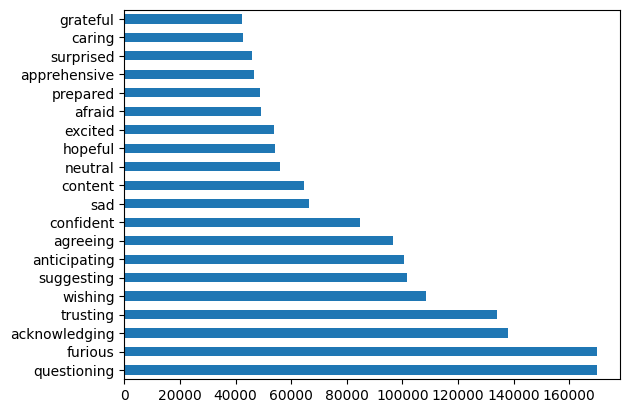

In [ ]:
df_downsampled['eb+_emot'].value_counts()[:20].plot(kind='barh')

<Axes: >

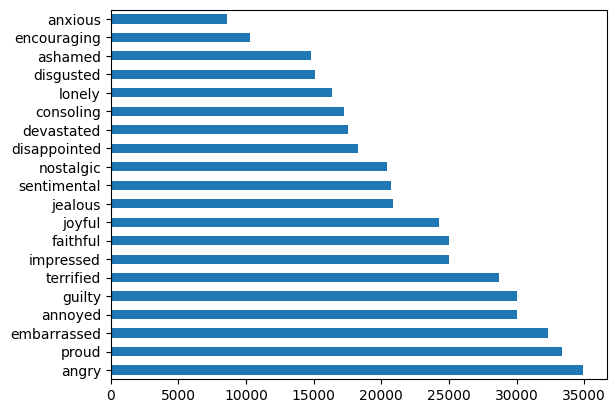

In [ ]:
df_downsampled['eb+_emot'].value_counts()[21:].plot(kind='barh')

In [ ]:
# maybe we have to reduce all the label, but in this way we reduce a lot the inital datset

In [ ]:
sample_df = df_downsampled.groupby('eb+_emot').apply(lambda x: x.sample(frac=0.05))
sample_df

dialogue_id  turn  \
eb+_emot                                   
acknowledging 673360        651816     3   
              2014246      7102357     1   
              1185561      3133074     1   
              835483       1423692     1   
              1318267      3771816     1   
...                            ...   ...   
wishing       1992942      6997608     1   
              1844234      6267532     4   
              1071615      2580328     2   
              1720674      5681741     2   
              2054328      7298493     2   

                                                                    uttr  \
eb+_emot                                                                   
acknowledging 673360                             Bravo ! You nailed it !   
              2014246                                            Danny .   
              1185561                     Jim ... put out that lantern .   
              835483                    That 's his middle name , atut .   
              1318267  Okay , Goldilocks Well , that was fun Yeah Sha...   
...                                                                  ...   
wishing       1992942  Oh , hello . Fancy seeing you in here . Hello ...   
              1844234         I see . It looks good on you . Thank you .   
              1071615                            I said , " Good night !   
              1720674              Hi , Molly . It 's nice to meet you .   
              2054328                                          Respect !   

                            eb+_emot  label_confidence  
eb+_emot                                                
acknowledging 673360   acknowledging          0.465149  
              2014246  acknowledging          0.558941  
              1185561  acknowledging          0.460270  
              835483   acknowledging          0.742046  
              1318267  acknowledging          0.524833  
...                              ...               ...  
wishing       1992942        wishing          0.945237  
              1844234        wishing          0.853609  
              1071615        wishing          0.999153  
              1720674        wishing          0.966649  
              2054328        wishing          0.813046  

[107889 rows x 5 columns]

<Axes: >

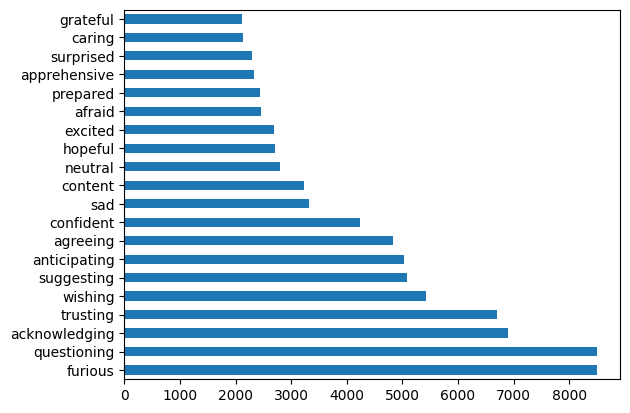

In [ ]:
sample_df['eb+_emot'].value_counts()[:20].plot(kind='barh')

<Axes: >

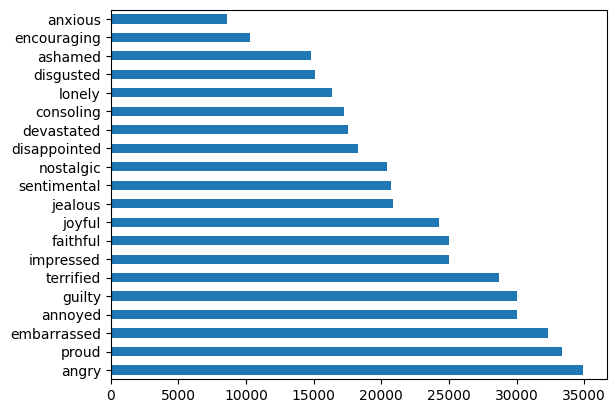

In [ ]:
df_downsampled['eb+_emot'].value_counts()[21:].plot(kind='barh')

-----------------------------------------------------------------------------------------------

In [ ]:
#if we train the logistic regression with the sampled datset as BERT

In [ ]:
import pandas as pd

In [ ]:
sample_df.to_csv("downsample.csv")

In [ ]:
data_x = sample_df["uttr"].tolist()

In [ ]:
data_y = sample_df["eb+_emot"].tolist()

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=2307)

In [ ]:
#una volta splittati 1 due datset in train and test, dobbiamo trasformare le diverse parole in vettori per poter essere capiti dal modello
#Nel caso riportato sotto siamo andati a formare il vettore contanto le frequenze delle diverse parole
#un'altra soluzione è quella di usare gli embedding per rappresentare le singole parole 
#o ancora passare direttamente tutta la frase inserita in un embedding (come ultimo laboratorio)

#la tranformazione in vettori la facciamo solamente per il train e non peril test (giusto??????)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

CountVectorizer()

In [ ]:
vectorizer = CountVectorizer(min_df=5, stop_words='english')
vectorizer.fit(train_x)
print(f"vocabulary size: {len(vectorizer.get_feature_names_out())}")
#we reduce  the vocabulary only 1341; we lose 16k words

vocabulary size: 8115


In [ ]:
train_x_vector = vectorizer.transform(train_x) #i can map the wors into vectors in order to train our classifier
train_x_vector

<86311x8115 sparse matrix of type '<class 'numpy.int64'>'
	with 383142 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression #we use logistic regression in order to build our model
model = LogisticRegression().fit(train_x_vector, train_y) 
print(model)

LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
train_y

eb+_emot             
questioning   784732      questioning
              586516      questioning
furious       334200          furious
trusting      770935         trusting
anticipating  759500     anticipating
                             ...     
trusting      1410543        trusting
questioning   369980      questioning
anticipating  1805714    anticipating
annoyed       812146          annoyed
lonely        1895172          lonely
Name: eb+_emot, Length: 86311, dtype: object

In [ ]:
test_x_vector = vectorizer.transform(test_x)
pred_y = model.predict(test_x_vector) #we learnd, and we use this model to predict the label of new data

In [ ]:
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(pred_y, test_y):.4f}')
#it's a linear model, so this accuracy is pretty decent
#if we use more complex model, we achive higher accuracy

#in order to achive higer accuracy can related to the pre-processing (in some case we have very noised daa so we have 
# to preprocess the data manually)

accuracy: 0.4256


-----------------------------------------------------------------------

In [ ]:
!pip3 install -q transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 123.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.2 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 49.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 52.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 59.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user


In [ ]:
!pip3 uninstall flask
!pip3 install -q eli5

Found existing installation: Flask 2.2.4
Uninstalling Flask-2.2.4:
  Would remove:
    /usr/local/bin/flask
    /usr/local/lib/python3.10/dist-packages/Flask-2.2.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/flask/*
Proceed (Y/n)? y
  Successfully uninstalled Flask-2.2.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import torch
import numpy as np

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
from datasets import Dataset, DatasetDict

ModuleNotFoundError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if device.type != 'cuda':
    raise SystemError('GPU device not found')

In [ ]:
from sklearn.model_selection import train_test_split
import numpy
temp_x, test_x, temp_y, test_y = train_test_split(numpy.array(sample_df['uttr']), numpy.array(sample_df['eb+_emot']), test_size=0.2)
train_x, valid_x, train_y, valid_y = train_test_split(temp_x, temp_y, test_size=0.2)
len(train_x)

NameError: ignored

In [ ]:

import ktrain
from ktrain import text

ModuleNotFoundError: ignored

In [ ]:

MODEL_NAME = 'distilbert-base-uncased' #we use this type of bert model (use a model that mimic a bigger one) quickly but less accurate
transformer = text.Transformer(MODEL_NAME, maxlen=500, classes=['angry', 'furious', 'prepared', 'acknowledging', 'trusting', 'confident', 'hopeful', 'caring', 'sentimental', 'anticipating', 'wishing', 'surprised', 'ashamed', 'questioning', 'sad', 'nostalgic', 'devastated', 'terrified', 'embarrassed', 'lonely', 'encouraging', 'suggesting', 'content', 'afraid', 'impressed', 'agreeing', 'apprehensive', 'proud', 'annoyed', 'anxious', 'grateful', 'excited', 'neutral', 'faithful', 'guilty', 'consoling', 'disgusted', 'disappointed', 'jealous', 'joyful', 'sympathizing'])

/usr/local/lib/python3.10/dist-packages/ktrain/text/preprocessor.py:382: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn(


In [ ]:
processed_train = transformer.preprocess_train(train_x, train_y)
processed_test = transformer.preprocess_test(valid_x, valid_y)

NameError: ignored

In [ ]:
model = transformer.get_classifier()
learner = ktrain.get_learner(model, train_data=processed_train, val_data=processed_test, batch_size=6) #the performance are too low

In [ ]:
learner.fit_onecycle(5e-5, 1)

NameError: ignored

In [ ]:
learner.validate(class_names=transformer.get_classes())

540/540 [==============================] - 63s 113ms/step
               precision    recall  f1-score   support

acknowledging       0.71      0.71      0.71      1138
       afraid       0.72      0.71      0.72       415
     agreeing       0.71      0.71      0.71       793
        angry       0.62      0.52      0.56       266
      annoyed       0.47      0.50      0.48       244
 anticipating       0.69      0.74      0.71       789
      anxious       0.80      0.50      0.62        74
 apprehensive       0.67      0.62      0.65       365
      ashamed       0.56      0.32      0.40       107
       caring       0.61      0.60      0.60       326
    confident       0.68      0.64      0.66       747
    consoling       0.68      0.51      0.58       134
      content       0.73      0.74      0.74       534
   devastated       0.60      0.29      0.39       142
 disappointed       0.64      0.46      0.53       151
    disgusted       0.66      0.59      0.62       121
  emba

array([[806,   1,  85, ...,   5,   5,  26],
       [  0, 294,   0, ...,  11,  22,   0],
       [ 57,   0, 562, ...,   2,  10,   5],
       ...,
       [  6,  29,   1, ..., 143,   0,   0],
       [  2,  19,  11, ...,   2, 804,   9],
       [ 28,   0,   0, ...,   0,   1, 769]])

In [ ]:
print(model.summary())

Model: "tf_distil_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  31529     
                                                                 
 dropout_39 (Dropout)        multiple                  0         
                                                                 
Total params: 66,985,001
Trainable params: 66,985,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#------------------------------------------------------------------------------------------

In [ ]:
# PROVARE A USARE LE FRASI VICINE PER ANDARE A PREDIRE FRASE CENTRALE